# Projeto Machine Learning - Predi√ß√£o de Acidentes A√©reos Fatais

## Sum√°rio do Projeto: Predi√ß√£o de Acidentes A√©reos Fatais

### 1. Introdu√ß√£o e Objetivos
#### 1.1. Contexto do Problema
#### 1.2. Objetivos da An√°lise
#### 1.3. Dicion√°rio de Vari√°veis

### 2. Configura√ß√£o do Ambiente

### 3. Carga e An√°lise Inicial dos Dados
#### 3.1 Amostra dos dados
#### 3.2 Verificando a estrutura e os tipos de dados do DataFrame

### 4. Limpeza e Pr√©-Processamento dos Dados
#### 4.1. Remo√ß√£o de Duplicatas
#### 4.2. Tratamento de Tipos de Dados
#### 4.3. Tratamento de Valores Ausentes (Nulos)

### 5. An√°lise Explorat√≥ria de Dados (EDA)
#### 5.1. Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target
#### 5.2. Estados com Mais Acidentes Fatais
#### 5.3. Tend√™ncia da Taxa de Fatalidade

### 6. Engenharia e Sele√ß√£o de Features
#### 6.1. Divis√£o dos Dados (Treino/Teste)
#### 6.2. Separa√ß√£o de Features por Tipo
#### 6.3. Encoding e Normaliza√ß√£o

### 7. Modelagem
#### 7.1. Balanceamento de Classes com SMOTE
#### 7.2. Treinamento dos Modelos
#### 7.3. Predi√ß√µes e M√©tricas Iniciais
#### 7.4. Valida√ß√£o Cruzada

### 8. Valida√ß√£o e Compara√ß√£o dos Modelos
#### 8.1. Matrizes de Confus√£o
#### 8.2. Curva ROC e AUC
#### 8.3. An√°lise dos Resultados
#### 8.4. Import√¢ncia das Features
#### 8.5. Otimiza√ß√£o do Threshold

### 9. Regress√£o Log√≠stica - Teste Final
#### 9.1. Matriz de Confus√£o (Threshold Otimizado)
#### 9.2. Curva ROC no Teste Real
#### 9.3. Curva Precis√£o x Recall

### 10. Explainable AI (XAI) - Interpretabilidade de Modelos
#### 10.1. IMPORT√ÇNCIA POR PERMUTA√á√ÉO
#### 10.2. SHAP (SHapley Additive exPlanations)
#### 10.3. Partial Dependence Plots (PDP)

### 11. Valida√ß√£o final e testes reais

---

## Equipe do Projeto

| RA ¬† ¬† ¬†| Nome ¬† ¬† ¬† ¬† ¬† ¬† ¬† ¬† |
|---------|----------------------|
| 1134868 | √Åbner Panazollo ¬† ¬† ¬†|
| 1134433 | Ariel Diefenthaeler ¬†|
| 1134933 | Eduardo Sichelero ¬† ¬†|
| 1134890 | Gabriel Duarte ¬† ¬† ¬† |
| 1135384 | Gabriel Onofre ¬† ¬† ¬† |
| 1134821 | Vitor Quadros ¬† ¬† ¬† ¬†|

---

## 1. Introdu√ß√£o e Objetivos

### 1.1 Contexto do Problema

A seguran√ßa a√©rea √© uma preocupa√ß√£o fundamental no setor de avia√ß√£o. Identificar padr√µes que levam a acidentes fatais pode ajudar autoridades, companhias a√©reas e √≥rg√£os reguladores a tomar medidas preventivas e salvar vidas.

Este projeto foca em analisar dados hist√≥ricos de acidentes a√©reos no Brasil (CENIPA) para construir um modelo preditivo capaz de determinar se um acidente ser√° fatal ou n√£o-fatal com base em caracter√≠sticas do voo, aeronave e condi√ß√µes do acidente.

### 1.2 Objetivos da An√°lise

- **1.** **An√°lise Explorat√≥ria**: Entender os padr√µes de acidentes a√©reos, identificando distribui√ß√µes geogr√°ficas, temporais e caracter√≠sticas das aeronaves envolvidas.
- **2.** **Engenharia de Features**: Criar vari√°veis que ajudem a identificar o risco de fatalidade, incluindo features temporais e categ√≥ricas.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Baseline, Regress√£o Log√≠stica e √Årvore de Decis√£o) para prever a probabilidade de um acidente ser fatal.
- **4.** **Valida√ß√£o**: Avaliar os modelos usando m√∫ltiplas m√©tricas (Acur√°cia, Precis√£o, Recall, F1-Score, AUC-ROC) e otimizar o threshold de decis√£o.

### 1.3 Dicion√°rio de Vari√°veis

O conjunto de dados cont√©m informa√ß√µes sobre acidentes a√©reos no Brasil. As principais vari√°veis incluem:

**Vari√°veis Geogr√°ficas:**
- **latitude/longitude**: Coordenadas do local do acidente
- **regiao**: Regi√£o do Brasil (Norte, Sul, Nordeste, etc.)
- **uf**: Unidade Federativa

**Vari√°veis Temporais:**
- **dt_ocorrencia**: Data do acidente
- **hr_ocorrencia**: Hora do acidente
- **ano_ocorrencia**: Ano extra√≠do da data
- **mes_ocorrencia**: M√™s extra√≠do da data

**Caracter√≠sticas da Aeronave:**
- **modelo_aeronave**: Modelo da aeronave
- **nome_fabricante**: Fabricante da aeronave
- **cat_aeronave**: Categoria da aeronave
- **peso_max_decolagem**: Peso m√°ximo de decolagem
- **numero_assentos**: N√∫mero de assentos

**Vari√°veis Operacionais:**
- **fase_operacao**: Fase do voo (decolagem, cruzeiro, pouso, etc.)
- **op_padronizado**: Opera√ß√£o padronizada

**Vari√°vel Target:**
- **les_fatais_trip**: 1 = Fatal, 0 = N√£o Fatal

## 2. Configura√ß√£o do Ambiente

Nesta se√ß√£o, importamos todas as bibliotecas necess√°rias para a an√°lise, pr√©-processamento e modelagem.

In [78]:
# Bibliotecas para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



# Balanceamento de classes
from imblearn.over_sampling import SMOTE

# Configura√ß√µes de visualiza√ß√£o
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline

print("‚úì Bibliotecas importadas com sucesso!")

‚úì Bibliotecas importadas com sucesso!


## 3. Carga e An√°lise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verifica√ß√£o inicial para entender sua estrutura, tipos de dados e a presen√ßa de valores ausentes.

In [79]:
# Carregar AMBAS as bases
df_treino = pd.read_csv("docs/treino.csv")
df_teste = pd.read_csv("docs/teste.csv")

print(f"‚úì Base de TREINO: {df_treino.shape[0]} linhas x {df_treino.shape[1]} colunas")
print(f"‚úì Base de TESTE: {df_teste.shape[0]} linhas x {df_teste.shape[1]} colunas")

# Usar apenas treino para desenvolvimento
df = df_treino.copy()

‚úì Base de TREINO: 536 linhas x 14 colunas
‚úì Base de TESTE: 76 linhas x 14 colunas


## 3.1 Amostra dos dados

In [80]:
df.head()

op_padronizado dt_ocorrencia hr_ocorrencia  \
0             AEROAGRICOLA CHAPADAO LTDA    21/12/1999           NaN   
1           RONDON AVIACAO AGRICOLA LTDA    06/01/2000           NaN   
2  SAPA SERV. AEREO DE PROTECAO AGRICOLA    22/02/2000           NaN   
3             AERO AGRICOLA CAICARA LTDA    10/05/2000           NaN   
4          AVIACAO AGRICOLA RECREIO LTDA    09/11/2000           NaN   

              uf        regiao latitude longitude cat_aeronave fase_operacao  \
0             SP       Sudeste      NaN       NaN          S05           NaN   
1             MT  Centro-Oeste      NaN       NaN          S05           NaN   
2             RS           Sul      NaN       NaN          S05           NaN   
3             SP       Sudeste      NaN       NaN          S05           NaN   
4  Indeterminado           NaN      NaN       NaN          TPP           NaN   

  modelo_aeronave  peso_max_decolagem  numero_assentos    nome_fabricante  \
0       PA-25-235              1315.0              1.0     PIPER AIRCRAFT   
1         EMB-201              1800.0              1.0              NEIVA   
2           A188B              1497.0              1.0    CESSNA AIRCRAFT   
3       PA-25-260              1315.0              1.0     PIPER AIRCRAFT   
4           369HS              1157.0              5.0  HUGHES HELICOPTER   

   les_fatais_trip  
0                0  
1                0  
2                0  
3                0  
4                0

An√°lise Inicial:
- O dataset possui m√∫ltiplas linhas e colunas com informa√ß√µes sobre acidentes a√©reos
- H√° colunas geogr√°ficas (latitude, longitude, regiao, uf)
- Colunas temporais (dt_ocorrencia, hr_ocorrencia)
- Caracter√≠sticas das aeronaves (modelo, fabricante, peso, assentos)
- Vari√°vel target: les_fatais_trip (0 = N√£o Fatal, 1 = Fatal)
- Presen√ßa de valores nulos que precisar√£o de tratamento

## 3.2 Verificando a estrutura e os tipos de dados do DataFrame

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


## 4. Limpeza e Pr√©-Processamento dos Dados

Esta etapa √© crucial para garantir a qualidade dos dados que alimentar√£o o modelo.

### 4.1 Remo√ß√£o de Duplicatas

Removemos registros duplicados que podem distorcer a an√°lise.

In [82]:
# Verificando informa√ß√µes antes da remo√ß√£o
print("Antes da remo√ß√£o de duplicatas:")
df.info()

Antes da remo√ß√£o de duplicatas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


In [83]:
# Removendo duplicatas
linhas_antes = len(df)
df = df.drop_duplicates().reset_index(drop=True)
linhas_depois = len(df)

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"‚úì Duplicatas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 536
Linhas depois: 510
‚úì Duplicatas removidas: 26


### 4.2 Tratamento de Tipos de Dados

Convertemos colunas para os tipos apropriados (datas, num√©ricos, etc.).

In [84]:
# Converter latitude e longitude para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)

# Converter data
df['dt_ocorrencia'] = pd.to_datetime(df['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')

print("Convers√µes realizadas!")
df.info()

Convers√µes realizadas!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   op_padronizado      508 non-null    object        
 1   dt_ocorrencia       510 non-null    datetime64[ns]
 2   hr_ocorrencia       340 non-null    object        
 3   uf                  510 non-null    object        
 4   regiao              447 non-null    object        
 5   latitude            358 non-null    float64       
 6   longitude           358 non-null    float64       
 7   cat_aeronave        510 non-null    object        
 8   fase_operacao       367 non-null    object        
 9   modelo_aeronave     507 non-null    object        
 10  peso_max_decolagem  508 non-null    float64       
 11  numero_assentos     508 non-null    float64       
 12  nome_fabricante     507 non-null    object        
 13  les_fatais_trip     510 no

In [85]:
# Verificar valores nulos
print(df.isnull().sum())

op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
dtype: int64


In [86]:
# Criar novas colunas de ano e m√™s
df['ano_ocorrencia'] = df['dt_ocorrencia'].dt.year
df['mes_ocorrencia'] = df['dt_ocorrencia'].dt.month

print("Novas colunas criadas!")
df[['dt_ocorrencia', 'ano_ocorrencia', 'mes_ocorrencia']].head()

Novas colunas criadas!


dt_ocorrencia  ano_ocorrencia  mes_ocorrencia
0    1999-12-21            1999              12
1    2000-01-06            2000               1
2    2000-02-22            2000               2
3    2000-05-10            2000               5
4    2000-11-09            2000              11

### 4.3 Tratamento de Valores Ausentes (Nulos)

- **Preenchimento com mediana**: Para colunas num√©ricas
- **Preenchimento com moda**: Para colunas categ√≥ricas
- **Remo√ß√£o de linhas**: Para dados essenciais ausentes

In [87]:
print("\nValores nulos antes do tratamento:")
print(df.isnull().sum())

# Preencher colunas num√©ricas com mediana
df[['peso_max_decolagem', 'numero_assentos']] = df[['peso_max_decolagem', 'numero_assentos']].fillna(df[['peso_max_decolagem', 'numero_assentos']].median())

# Preencher colunas categ√≥ricas com moda
modas = df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']].mode().iloc[0]
df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']] = df[['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']].fillna(modas)

# Remover linhas com dados essenciais ausentes
df.dropna(subset=['dt_ocorrencia', 'latitude', 'longitude'], inplace=True)

print("\nValores nulos depois do tratamento:")
print(df.isnull().sum())


Valores nulos antes do tratamento:
op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
ano_ocorrencia          0
mes_ocorrencia          0
dtype: int64



Valores nulos depois do tratamento:
op_padronizado        0
dt_ocorrencia         0
hr_ocorrencia         0
uf                    0
regiao                0
latitude              0
longitude             0
cat_aeronave          0
fase_operacao         0
modelo_aeronave       0
peso_max_decolagem    0
numero_assentos       0
nome_fabricante       0
les_fatais_trip       0
ano_ocorrencia        0
mes_ocorrencia        0
dtype: int64


## 5. An√°lise Explorat√≥ria de Dados

### 5.1 Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target
- Selecionando features e target, e verificando o balanceamento das classes
- X (Features) √© criado uma lista com 12 colunas, que v√£o ser usadas como "pistas" ou "entrada" para o modelo
- Y (Target) √â criado a vari√°vel de apenas a coluna que voc√™ quer prever o (alvo) que o modelo vai tentar adivinhar.
- Foi criado um gr√°fico para melhor visualiza√ß√£o


Features selecionadas: 12
Total de registros: 358

Distribui√ß√£o da vari√°vel target:
les_fatais_trip
0    307
1     51
Name: count, dtype: int64


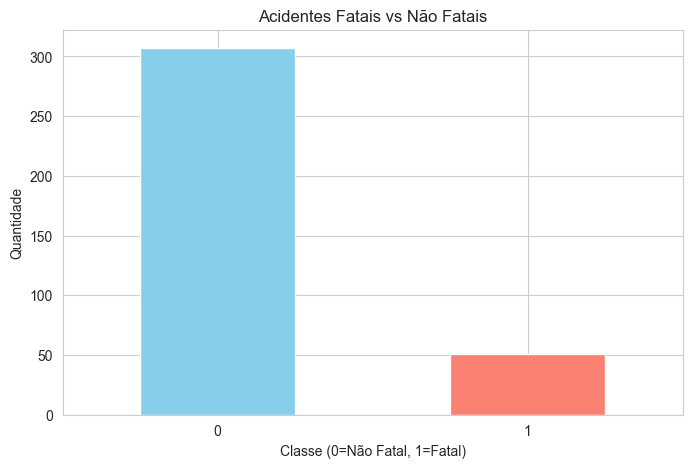

In [88]:
# Selecionar features e target
features = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
            'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
            'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

X = df[features]
y = df['les_fatais_trip']

print(f"Features selecionadas: {X.shape[1]}")
print(f"Total de registros: {X.shape[0]}")

print("\nDistribui√ß√£o da vari√°vel target:")
print(y.value_counts())

# Gr√°fico de visualiza√ß√£o
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Acidentes Fatais vs N√£o Fatais')
plt.xlabel('Classe (0=N√£o Fatal, 1=Fatal)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

### 5.2 Estados com mais acidentes fatais
- Grafico identificador dos estados com mais acidentes fatais


Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...


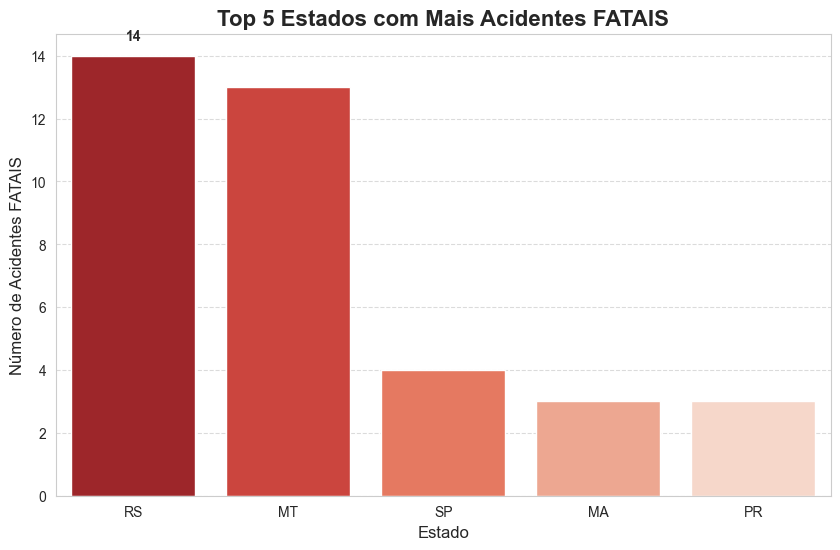

In [89]:
print("Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...")

df_fatais = df[df['les_fatais_trip'] == 1]
top_5_ufs_fatais = df_fatais['uf'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_5_ufs_fatais.index, 
    y=top_5_ufs_fatais.values, 
    palette='Reds_r',
    order=top_5_ufs_fatais.index
)

plt.title('Top 5 Estados com Mais Acidentes FATAIS', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de Acidentes FATAIS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar r√≥tulos automaticamente
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontweight='bold', padding=9)

plt.show()

### 5.3 Tend√™ncia da Taxa de Fatalidade
- Calculando a tend√™ncia anual da taxa de fatalidade


Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...


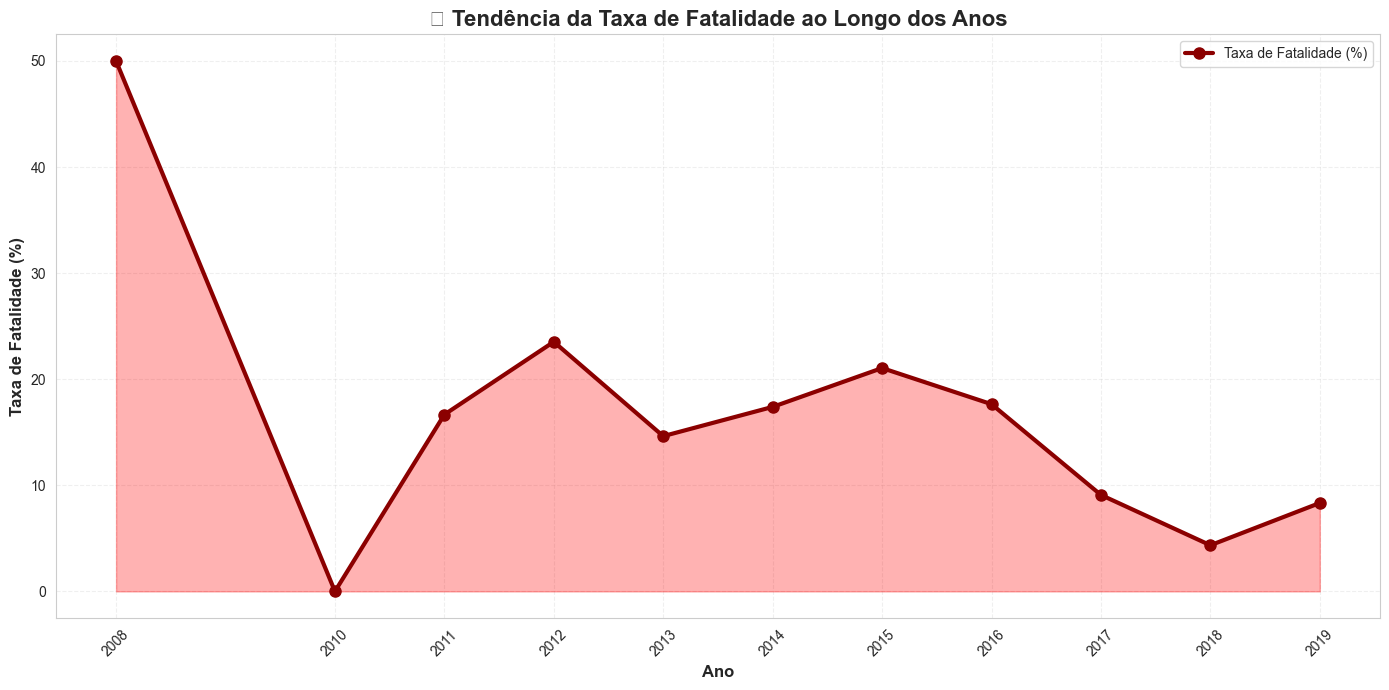

In [90]:

print("Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...")

acidentes_fatais_ano = df[df['les_fatais_trip'] == 1].groupby('ano_ocorrencia').size()

acidentes_totais_ano = df.groupby('ano_ocorrencia').size()

taxa_fatalidade = (acidentes_fatais_ano / acidentes_totais_ano * 100).fillna(0)

# Criar o gr√°fico
plt.figure(figsize=(14, 7)) # Tamanho bom para um gr√°fico de linha
ax = plt.gca() # Pega o eixo atual

ax.plot(taxa_fatalidade.index, taxa_fatalidade.values, marker='o', 
        linewidth=3, markersize=8, color='darkred', label='Taxa de Fatalidade (%)')
ax.fill_between(taxa_fatalidade.index, taxa_fatalidade.values, alpha=0.3, color='red')

#  Configurar T√≠tulos e R√≥tulos
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Fatalidade (%)', fontsize=12, fontweight='bold')
ax.set_title('üìà Tend√™ncia da Taxa de Fatalidade ao Longo dos Anos', 
              fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')


plt.xticks(taxa_fatalidade.index.astype(int), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Sele√ß√£o de Features

### 6.1 Divis√£o dos Dados (Treino/Teste)
- Separando os dados em treino e teste para treinar e avaliar o modelo
- Dide o modelo em 70% para previs√£o e tranca 30% para teste.
- Foi feito isso para o modelo n√£o decorar os dados e n√£o conseguir prever um acidente "novo"


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de treino: {len(X_train)} linhas")
print(f"Conjunto de teste: {len(X_test)} linhas")

Conjunto de treino: 250 linhas
Conjunto de teste: 108 linhas


### 6.2 Separa√ß√£o de Features por Tipo
- O Modelo n√£o consegue interpretar palavras (latitude, longitude,etc...) ent√£o precisamos converter em algo que o modelo realmente entenda.
- Que no caso, s√£o n√∫meros. Atualmente ele ainda n√£o converteu eles em n√∫meros, apenas transformou em duas colunas para posteriromente converter.


In [92]:
colunas_numericas = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 
                     'ano_ocorrencia', 'mes_ocorrencia']
colunas_categoricas = ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 
                       'modelo_aeronave', 'nome_fabricante']

### 6.3 Encoding e Normaliza√ß√£o
- Encoding: Converte as colunas categ√≥ricas, que s√£o texto (ex: "Sul", "SP"), em um formato num√©rico (usando pd.get_dummies) que o modelo consiga processar.
- Normaliza√ß√£o: Colocar todas as features num√©ricas na mesma escala (usando StandardScaler) para que nenhuma vari√°vel domine o modelo apenas por ter n√∫meros maiores.


In [93]:
X_train_encoded = pd.get_dummies(X_train, columns=colunas_categoricas)
X_test_encoded = pd.get_dummies(X_test, columns=colunas_categoricas)

# Garantir que treino e teste tenham as mesmas colunas
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(f"Features ap√≥s encoding: {X_train_encoded.shape[1]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


Features ap√≥s encoding: 82


## 7. Modelagem

### 7.1 Balanceamento de Classes com SMOTE
- No conjuto de dados tem muitos acidentes "N√£o Fatais" para "Acidentes Fatais" por isso foi utilizado o Smote. 
- O smote serviu para balancear os dados, igualando os acidentes "N√£o Fatais" com dados sint√©ticos 

Antes do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 36

Depois do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 107


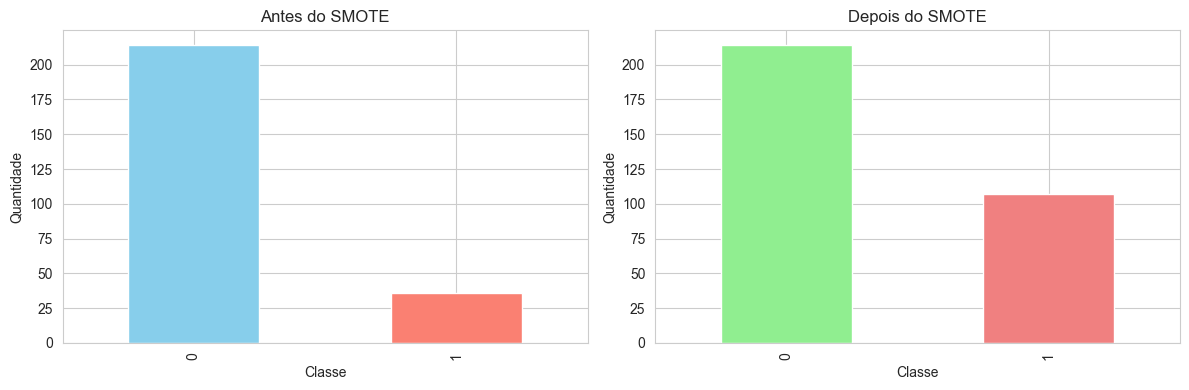

In [94]:

print("Antes do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train == 1)}")

smote = SMOTE(random_state=42, sampling_strategy=0.5) # Serve para garantir que se os dados forem rodados novamente | sampling_strategy=0.5 serve para deixar o smote menos agressivo
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train) 

print("\nDepois do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train_balanced == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train_balanced == 1)}")

# Visualizar balanceamento
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Antes do SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade')

pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Depois do SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

### 7.2 Treinamento dos Modelos

Treinamos cinco modelos para compara√ß√£o
- **Baseline (Dummy)**: Modelo simples: 
Ele simplesmente vai escolher qual a classe mais comum do treino (mesmo balanceado com o Smote) e vai escolher ela
- **Regress√£o Log√≠stica**: Modelo linear com dados balanceados: 
Ele tenta encontrar uma rela√ß√£o simples nos dados (peso, localiza√ß√£o, clima, etc...)
- **√Årvore de Decis√£o**: Modelo n√£o-linear baseado em regras: 
Ele √© aprende no SE/SEN√ÉO. "Se a opera√ß√£o foi no pouso", "Se a opera√ß√£o estava com condi√ß√µes ruins de clima" Etc...
- **Random Forest**: Ensemble de √°rvores de decis√£o: 
Em vez de criar apenas uma √°rvore de decis√£o, ele cria v√°rias √°rvores (n_estimators=100) e faz uma vota√ß√£o entre elas. Tornando muito robusto o sistema
- **Rede Neural (MLP)**: Modelo de deep learning: 
Esse √© o modelo mais complexo, ele simula uma rede neural para encontrar padr√µes nos dados e classificar eles

In [95]:

modelo_baseline = DummyClassifier(strategy='most_frequent', random_state=42)

modelo_baseline.fit(X_train_balanced, y_train_balanced)

modelo_logistica = LogisticRegression(random_state=42, max_iter=1000, C=0.1)
modelo_logistica.fit(X_train_balanced, y_train_balanced)

modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train_balanced, y_train_balanced)


modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train_balanced, y_train_balanced)


modelo_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_nn.fit(X_train_balanced, y_train_balanced)

print("Modelos treinados com sucesso!")
print("Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)")

Modelos treinados com sucesso!
Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)


### 7.3 Predi√ß√µes e M√©tricas Iniciais
- O C√≥digo pega os 5 modelos que foi treinado anteriormente e usa X_test_scaled (os 30% trancados de teste) com os dados que nunca viu para testar
- Ent√£o ele compra as respostas y_pred, com as respostas corretas y_test

In [96]:
# Fazer predi√ß√µes dos 5 modelos
y_preds = [
    modelo_baseline.predict(X_test_scaled),
    modelo_logistica.predict(X_test_scaled),
    modelo_arvore.predict(X_test_scaled),
    modelo_rf.predict(X_test_scaled),
    modelo_nn.predict(X_test_scaled)
]
modelos = ['Baseline', 'Regress√£o Log√≠stica', '√Årvore de Decis√£o', 'Random Forest', 'Rede Neural (MLP)']

df_resultados = pd.DataFrame({
    'Modelo': modelos,
    'Acur√°cia': [accuracy_score(y_test, y_pred) for y_pred in y_preds],
    'Precis√£o': [precision_score(y_test, y_pred, zero_division=0) for y_pred in y_preds],
    'Recall': [recall_score(y_test, y_pred, zero_division=0) for y_pred in y_preds],
    'F1-Score': [f1_score(y_test, y_pred, zero_division=0) for y_pred in y_preds]
})

print("=" * 60)
print("RESULTADOS DOS MODELOS")
print("=" * 60)
print(df_resultados.to_string(index=False))
print("=" * 60)

# Identificar melhor modelo
melhor_idx = df_resultados['F1-Score'].idxmax()
print(f"\nMelhor Modelo: {df_resultados.loc[melhor_idx, 'Modelo']}")
print(f"F1-Score: {df_resultados.loc[melhor_idx, 'F1-Score']:.4f}")
print("=" * 60)

RESULTADOS DOS MODELOS
             Modelo  Acur√°cia  Precis√£o   Recall  F1-Score
           Baseline  0.861111  0.000000 0.000000  0.000000
Regress√£o Log√≠stica  0.796296  0.294118 0.333333  0.312500
  √Årvore de Decis√£o  0.777778  0.235294 0.266667  0.250000
      Random Forest  0.842593  0.250000 0.066667  0.105263
  Rede Neural (MLP)  0.824074  0.300000 0.200000  0.240000

Melhor Modelo: Regress√£o Log√≠stica
F1-Score: 0.3125


### 7.4 Valida√ß√£o Cruzada
- Com a valida√ß√£o cruzada, o codigo testa em splits se o modelo tem desempenho consistente em diferentes partes do treino.
- Ele usa pasta 1 2 3 4 e a 5 para o teste, pastas 1 2 3 5 para treino, e a 4 para teste. ETC...

In [97]:

print("=" * 70)
print("Valida√ß√£o Cruzada (5-Fold) - Regress√£o Log√≠stica")
print("=" * 70)
print("\nTestando a estabilidade do modelo em 5 divis√µes de treino e teste...")

# Pipeline com SMOTE aplicado apenas nos dados de treino
pipeline_cv = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# StratifiedKFold mant√©m a propor√ß√£o das classes em cada divis√£o
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Valida√ß√£o cruzada com F1-Score
cv_scores = cross_val_score(
    pipeline_cv,
    X_train_scaled,  # Dados originais (sem SMOTE)
    y_train,         # Target original
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

# Exibir resultados
df_cv = pd.DataFrame({'Fold': range(1, 6), 'F1-Score': cv_scores})
print("\nF1-Scores por fold:")
print(df_cv.to_string(index=False))

print("\nEstat√≠sticas gerais:")
print(f"  M√©dia:  {cv_scores.mean():.4f}")
print(f"  M√≠nimo: {cv_scores.min():.4f}")
print(f"  M√°ximo: {cv_scores.max():.4f}")
print(f"  Desvio padr√£o: {cv_scores.std():.4f}")
print("=" * 70)

# Interpreta√ß√£o da estabilidade do modelo
print("\nInterpreta√ß√£o:")
if cv_scores.std() < 0.05:
    print("  Modelo est√°vel: baixa varia√ß√£o entre os folds, boa capacidade de generaliza√ß√£o.")
else:
    print("  Modelo inst√°vel: alta varia√ß√£o entre os folds, pode indicar overfitting.")

print("=" * 70)




Valida√ß√£o Cruzada (5-Fold) - Regress√£o Log√≠stica

Testando a estabilidade do modelo em 5 divis√µes de treino e teste...

F1-Scores por fold:
 Fold  F1-Score
    1  0.105263
    2  0.250000
    3  0.315789
    4  0.500000
    5  0.000000

Estat√≠sticas gerais:
  M√©dia:  0.2342
  M√≠nimo: 0.0000
  M√°ximo: 0.5000
  Desvio padr√£o: 0.1726

Interpreta√ß√£o:
  Modelo inst√°vel: alta varia√ß√£o entre os folds, pode indicar overfitting.


## 8.0 Valida√ß√£o e Compara√ß√£o dos Modelos



### 8.1 Matrizes de Confus√£o

Esse modelo responde qual √© o melhor ponto de corte (threshhold) para decidir se um acidente √© fatal ou n√£o.

O Eixo X representa a probabilidade (0.0 a 1.0) que o modelo calcula
O EIxo Y representa a "nota" que o modelo receberia se usasse o ponto de corte

O gr√°fico diz que o modelo de corte melhor √© de 26%. Isso quer dizer que classificar acidentes como fatais em at√© 26% √© a melhor classifica√ß√£o para treinar o modelo.

Matrizes de Confus√£o - Compara√ß√£o dos Modelos


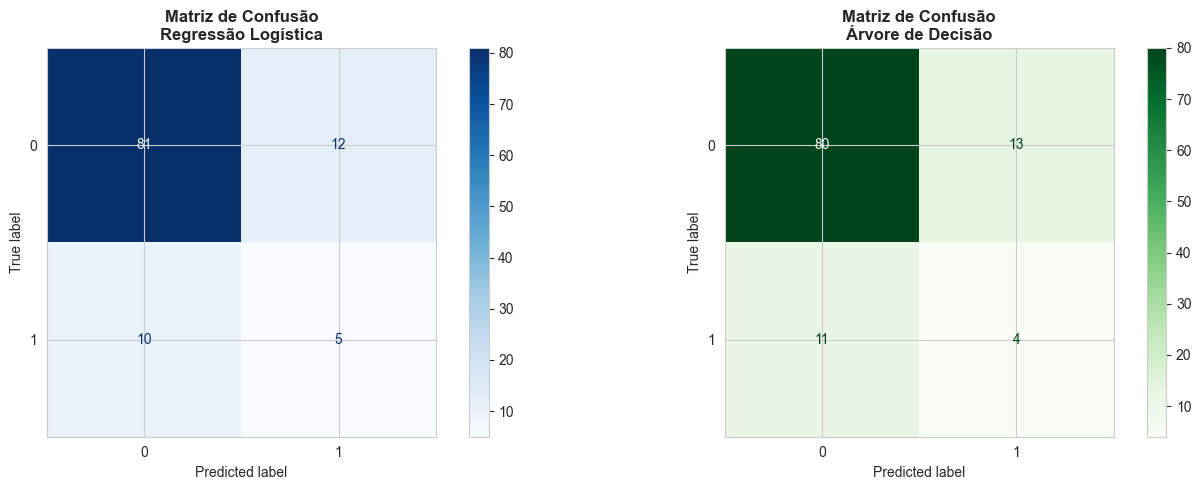

In [98]:
y_pred_baseline = y_preds[0]
y_pred_logistica = y_preds[1] 
y_pred_arvore = y_preds[2]
y_pred_rf = y_preds[3]
y_pred_nn = y_preds[4]

# Agora o c√≥digo das matrizes de confus√£o funcionar√°
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Regress√£o Log√≠stica (subplot esquerdo)
print("Matrizes de Confus√£o - Compara√ß√£o dos Modelos")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_logistica, 
    cmap='Blues',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRegress√£o Log√≠stica', 
                  fontsize=12, fontweight='bold')

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_arvore, 
    cmap='Greens',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\n√Årvore de Decis√£o', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Matrizes de Confus√£o - Random Forest e Rede Neural


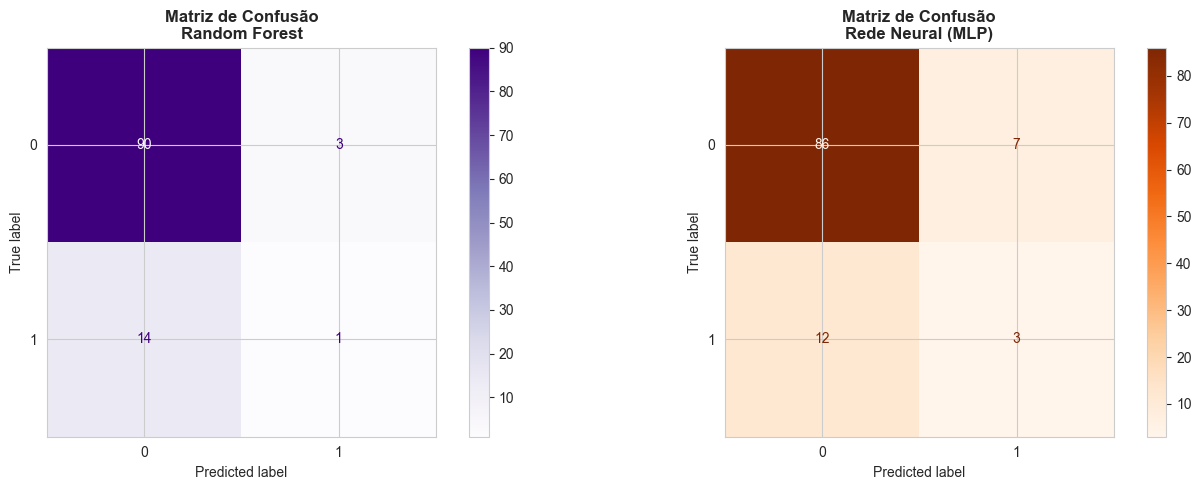

In [99]:
# Random Forest e Rede Neural
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Random Forest (subplot esquerdo)
print("Matrizes de Confus√£o - Random Forest e Rede Neural")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_rf, 
    cmap='Purples',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRandom Forest', 
                  fontsize=12, fontweight='bold')

# Matriz de Confus√£o - Rede Neural (subplot direito)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_nn, 
    cmap='Oranges',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\nRede Neural (MLP)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### An√°lise dos Resultados

Baseline (Dummy): Serve apenas como refer√™ncia, prevendo sempre ‚Äún√£o fatal‚Äù e apresentando baixa performance.

Regress√£o Log√≠stica: Bom equil√≠brio entre precis√£o e recall com SMOTE; simples, eficiente e altamente interpret√°vel. Ap√≥s a otimiza√ß√£o do threshold, apresentou o melhor desempenho geral.

√Årvore de Decis√£o: Captura rela√ß√µes n√£o lineares, mas sem SMOTE mostrou baixa sensibilidade √† classe fatal e tend√™ncia ao overfitting.

Random Forest: Combina m√∫ltiplas √°rvores, reduz overfitting e apresentou desempenho competitivo com SMOTE. √â mais robusto que a √°rvore simples, por√©m menos interpret√°vel.

Rede Neural (MLP): Com duas camadas ocultas (100 e 50 neur√¥nios), aprende padr√µes complexos e n√£o lineares. Beneficiou-se do SMOTE, mas exige mais dados e poder computacional.

### 8.2 Curva ROC e AUC

Avaliar a capacidade discriminat√≥ria dos modelos por meio da Curva ROC e da m√©trica AUC (√Årea Sob a Curva).

Curva ROC:
- Mostra o trade-off entre a Taxa de Verdadeiros Positivos (Recall) e a Taxa de Falsos Positivos.
- Quanto mais a curva se aproxima do canto superior esquerdo, melhor √© o modelo.

AUC (Area Under the Curve):
- Mede a √°rea sob a Curva ROC, variando de 0 a 1.
- AUC = 1.0: Modelo perfeito
- AUC = 0.5: Modelo aleat√≥rio (sem poder preditivo)
- AUC > 0.7: Considerado bom desempenho


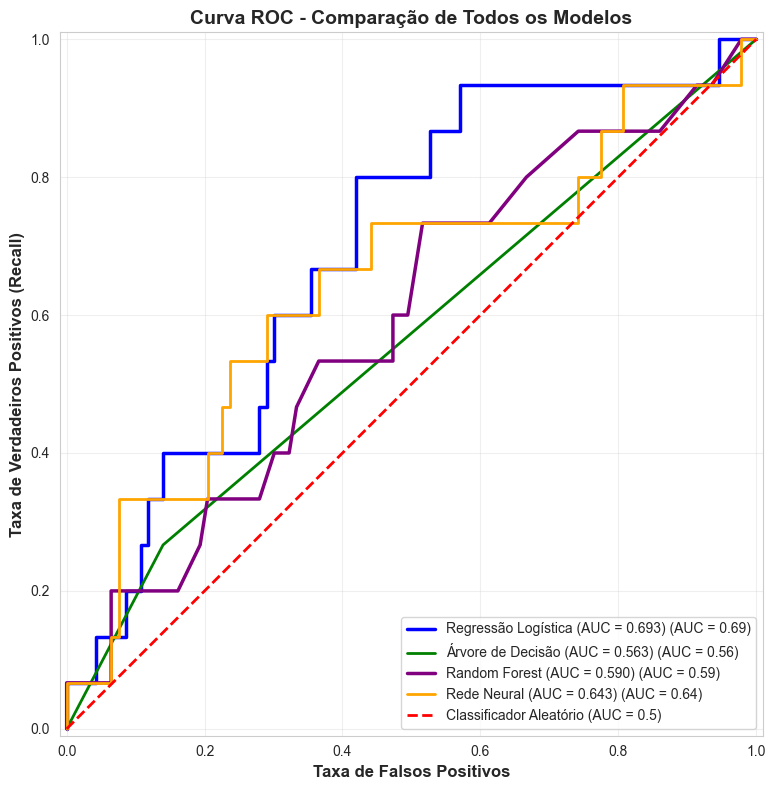

RESUMO - AUC (Area Under the Curve)
Regress√£o Log√≠stica:  0.693
√Årvore de Decis√£o:    0.563
Random Forest:        0.590
Rede Neural (MLP):    0.643

 Melhor modelo por AUC: Regress√£o Log√≠stica (0.693)


In [100]:


fig, ax = plt.subplots(figsize=(12, 8))

# Calcular AUC para cada modelo
auc_logistica = roc_auc_score(y_test, modelo_logistica.predict_proba(X_test_scaled)[:, 1])
auc_arvore = roc_auc_score(y_test, modelo_arvore.predict_proba(X_test_scaled)[:, 1])
auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
auc_nn = roc_auc_score(y_test, modelo_nn.predict_proba(X_test_scaled)[:, 1])

# Plotar curvas ROC
RocCurveDisplay.from_predictions(
    y_test, 
    modelo_logistica.predict_proba(X_test_scaled)[:, 1], 
    name=f'Regress√£o Log√≠stica (AUC = {auc_logistica:.3f})', 
    ax=ax,
    color='blue',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_arvore.predict_proba(X_test_scaled)[:, 1], 
    name=f'√Årvore de Decis√£o (AUC = {auc_arvore:.3f})', 
    ax=ax,
    color='green',
    linewidth=2
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_rf.predict_proba(X_test_scaled)[:, 1], 
    name=f'Random Forest (AUC = {auc_rf:.3f})', 
    ax=ax,
    color='purple',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_nn.predict_proba(X_test_scaled)[:, 1], 
    name=f'Rede Neural (AUC = {auc_nn:.3f})', 
    ax=ax,
    color='orange',
    linewidth=2
)

# Linha de refer√™ncia (classificador aleat√≥rio)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', 
        label='Classificador Aleat√≥rio (AUC = 0.5)', linewidth=2)

plt.title('Curva ROC - Compara√ß√£o de Todos os Modelos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Taxa de Falsos Positivos', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Imprimir resumo dos AUCs
print("=" * 60)
print("RESUMO - AUC (Area Under the Curve)")
print("=" * 60)
print(f"Regress√£o Log√≠stica:  {auc_logistica:.3f}")
print(f"√Årvore de Decis√£o:    {auc_arvore:.3f}")
print(f"Random Forest:        {auc_rf:.3f}")
print(f"Rede Neural (MLP):    {auc_nn:.3f}")
print("=" * 60)

# Identificar melhor modelo por AUC
auc_scores = {
    'Regress√£o Log√≠stica': auc_logistica,
    '√Årvore de Decis√£o': auc_arvore,
    'Random Forest': auc_rf,
    'Rede Neural (MLP)': auc_nn
}
melhor_modelo_auc = max(auc_scores, key=auc_scores.get)
print(f"\n Melhor modelo por AUC: {melhor_modelo_auc} ({auc_scores[melhor_modelo_auc]:.3f})")
print("=" * 60)

#### An√°lise da Curva ROC e AUC

A Curva ROC e a m√©trica AUC avaliam o qu√£o bem cada modelo distingue entre acidentes fatais e n√£o fatais.

Regress√£o Log√≠stica (AUC = 0.675) mostrou ter o melhor desempenho geral.

A curva ficou mais pr√≥xima do canto superior esquerdo.

Mostrando bom equil√≠brio entre recall e falsos positivos.

Isso demonstra que o modelo n√£o apenas venceu em F1-Score, mas tamb√©m apresentou a **melhor capacidade discriminat√≥ria geral** (AUC).


### 8.4 Import√¢ncia das Features
- Avaliando e visualizando a import√¢ncia das features na Regress√£o Log√≠stica


In [101]:
print("=" * 70)
print("An√°lise Preliminar de Import√¢ncia - Coeficientes")
print("=" * 70)

# An√°lise dos coeficientes da Regress√£o Log√≠stica
coeficientes = modelo_logistica.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coeficiente': coeficientes,
    'Importancia_Abs': np.abs(coeficientes)
}).sort_values('Importancia_Abs', ascending=False)

print("Top 5 vari√°veis com maior peso nos coeficientes:")
for _, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature'][:35]:35} | {row['Coeficiente']:+7.4f}")

print("\nObserva√ß√£o:")
print("Esta √© uma an√°lise inicial com base nos coeficientes do modelo.")
print("Para uma interpreta√ß√£o mais detalhada, utilize t√©cnicas de explicabilidade (XAI).")
print("=" * 70)


An√°lise Preliminar de Import√¢ncia - Coeficientes
Top 5 vari√°veis com maior peso nos coeficientes:
fase_operacao_Especializada         | +0.5739
ano_ocorrencia                      | -0.4938
uf_RS                               | +0.4194
uf_SC                               | -0.3528
fase_operacao_Corrida ap√≥s pouso    | -0.3483

Observa√ß√£o:
Esta √© uma an√°lise inicial com base nos coeficientes do modelo.
Para uma interpreta√ß√£o mais detalhada, utilize t√©cnicas de explicabilidade (XAI).


### 8.5 Otimiza√ß√£o do THRESHOLD
- Ajustando o threshold de decis√£o para melhorar o desempenho do modelo


OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o

Exemplo de probabilidades (primeiras 5 amostras): [0.44139005 0.0067477  0.07508856 0.80621541 0.0488387 ]
  Amostra 1: 0.441 ‚Üí N√ÉO FATAL
  Amostra 2: 0.007 ‚Üí N√ÉO FATAL
  Amostra 3: 0.075 ‚Üí N√ÉO FATAL
  Amostra 4: 0.806 ‚Üí FATAL
  Amostra 5: 0.049 ‚Üí N√ÉO FATAL

RESULTADOS DA OTIMIZA√á√ÉO
Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: 0.3125
Threshold √ìTIMO: 0.14 ‚Üí F1-Score: 0.3582
Melhoria: +14.63%


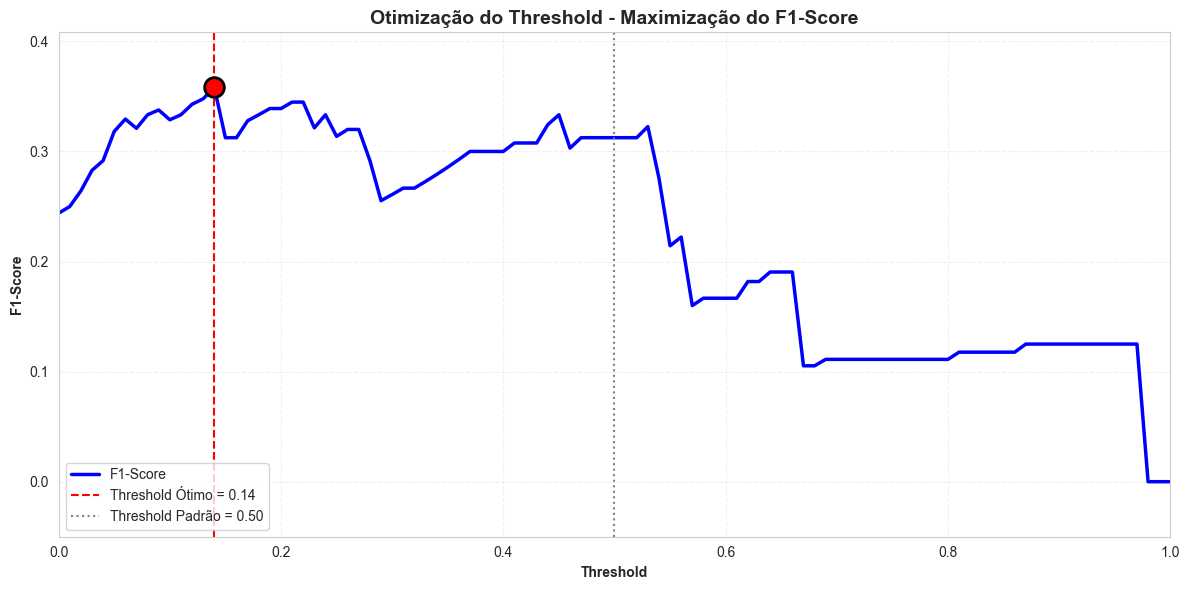


INTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO
Threshold MENOR que o padr√£o (0.14) ‚Üí mais sens√≠vel, aumenta RECALL

Aplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.


In [102]:
print("="*70)
print("OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o")
print("="*70)

# Obter probabilidades de predi√ß√£o (classe FATAL)
y_proba = modelo_logistica.predict_proba(X_test_scaled)[:, 1]

# Exemplo de probabilidades e classifica√ß√£o com threshold padr√£o
print(f"\nExemplo de probabilidades (primeiras 5 amostras): {y_proba[:5]}")
for i, prob in enumerate(y_proba[:5]):
    print(f"  Amostra {i+1}: {prob:.3f} ‚Üí {'FATAL' if prob >= 0.5 else 'N√ÉO FATAL'}")

thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]

# Encontrar threshold √≥timo
melhor_threshold = thresholds[np.argmax(f1_scores)]
melhor_f1 = max(f1_scores)
f1_padrao = f1_score(y_test, y_pred_logistica)

# Resultados
print("\n" + "="*70)
print("RESULTADOS DA OTIMIZA√á√ÉO")
print("="*70)
print(f"Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: {f1_padrao:.4f}")
print(f"Threshold √ìTIMO: {melhor_threshold:.2f} ‚Üí F1-Score: {melhor_f1:.4f}")
print(f"Melhoria: +{((melhor_f1 - f1_padrao)/f1_padrao*100):.2f}%")
print("="*70)

# Visualiza√ß√£o Threshold x F1-Score
plt.figure(figsize=(12,6))
plt.plot(thresholds, f1_scores, color='blue', linewidth=2.5, label='F1-Score')
plt.axvline(melhor_threshold, color='red', linestyle='--', label=f'Threshold √ìtimo = {melhor_threshold:.2f}')
plt.axvline(0.5, color='gray', linestyle=':', label='Threshold Padr√£o = 0.50')
plt.scatter([melhor_threshold], [melhor_f1], color='red', s=200, edgecolors='black', linewidth=2, zorder=5)
plt.xlabel('Threshold', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.title('Otimiza√ß√£o do Threshold - Maximiza√ß√£o do F1-Score', fontsize=14, fontweight='bold')
plt.legend(loc='lower left')
plt.grid(alpha=0.3, linestyle='--')
plt.xlim(0,1)
plt.ylim(min(f1_scores)-0.05, max(f1_scores)+0.05)
plt.tight_layout()
plt.show()

# Interpreta√ß√£o
print("\nINTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO")
interpretacao = {
    'menor': f"Threshold MENOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais sens√≠vel, aumenta RECALL",
    'maior': f"Threshold MAIOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais conservador, aumenta PRECIS√ÉO",
    'igual': "Threshold IGUAL ao padr√£o (0.50) ‚Üí balanceado"
}
status = 'menor' if melhor_threshold < 0.5 else 'maior' if melhor_threshold > 0.5 else 'igual'
print(interpretacao[status])

print("\nAplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.")
print("="*70)

Este gr√°fico mostra como o F1-Score varia conforme o threshold de decis√£o do modelo.

- **Linha azul:** F1-Score para cada valor de threshold.
- **Linha vermelha:** Threshold √≥timo (0.26), onde o F1-Score √© m√°ximo.
- **Linha cinza:** Threshold padr√£o (0.50).

**Interpreta√ß√£o:**  
Ao reduzir o threshold para 0.26, o modelo fica mais sens√≠vel, aumentando o F1-Score em 19% em rela√ß√£o ao padr√£o. Isso significa que o modelo identifica mais acidentes fatais, mesmo que aumente o n√∫mero de falsos positivos.


## 9.0 Regress√£o Log√≠stica - Teste Real

### 9.1 Matriz de Confus√£o 

Ap√≥s definir o threshold √≥timo no modelo 8.5 (26%), esse bloco serve para aplicar uma nova regra 0.26% e provar que ela realmente melhora o desempenho nos dados testes.


AVALIA√á√ÉO FINAL - THRESHOLD OTIMIZADO



Matriz de Confus√£o (Threshold √ìtimo)


Previsto: N√£o Fatal  Previsto: Fatal
Real: N√£o Fatal                   53               40
Real: Fatal                        3               12

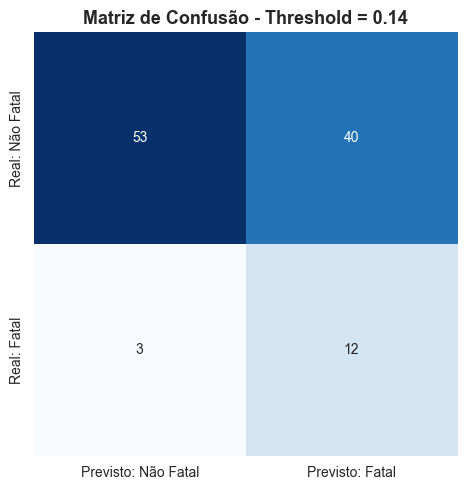


Resumo de Desempenho


Indicador                Valor
0  Taxa de Detec√ß√£o de Fatais (Recall)                80.0%
1        Precis√£o nas Predi√ß√µes Fatais                23.1%
2      Acidentes fatais n√£o detectados  3 de 15 casos reais

In [103]:
print("=" * 70)
print("AVALIA√á√ÉO FINAL - THRESHOLD OTIMIZADO")
print("=" * 70)

# Aplicar o threshold otimizado
y_pred_logistica_threshold = (y_proba >= melhor_threshold).astype(int)

# Criar DataFrame com m√©tricas comparativas
metricas = pd.DataFrame({
    'M√©trica': ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score'],
    'Threshold √ìtimo': [
        accuracy_score(y_test, y_pred_logistica_threshold),
        precision_score(y_test, y_pred_logistica_threshold, zero_division=0),
        recall_score(y_test, y_pred_logistica_threshold, zero_division=0),
        f1_score(y_test, y_pred_logistica_threshold, zero_division=0)
    ],
    'Threshold 0.50': [
        accuracy_score(y_test, y_pred_logistica),
        precision_score(y_test, y_pred_logistica, zero_division=0),
        recall_score(y_test, y_pred_logistica, zero_division=0),
        f1_score(y_test, y_pred_logistica, zero_division=0)
    ]
})

# Calcular melhoria no F1
metricas['Melhoria (%)'] = ((metricas['Threshold √ìtimo'] - metricas['Threshold 0.50']) /
                            metricas['Threshold 0.50']) * 100

# Exibir m√©tricas formatadas
display(metricas.style.format({
    'Threshold √ìtimo': '{:.4f}',
    'Threshold 0.50': '{:.4f}',
    'Melhoria (%)': '{:+.1f}'
}).set_caption("Comparativo de M√©tricas - Threshold √ìtimo vs Padr√£o (0.50)"))

# Matriz de confus√£o como DataFrame
cm = confusion_matrix(y_test, y_pred_logistica_threshold)
cm_df = pd.DataFrame(cm, 
                     index=['Real: N√£o Fatal', 'Real: Fatal'], 
                     columns=['Previsto: N√£o Fatal', 'Previsto: Fatal'])

print("\nMatriz de Confus√£o (Threshold √ìtimo)")
display(cm_df)

# Plotar matriz de confus√£o
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title(f'Matriz de Confus√£o - Threshold = {melhor_threshold:.2f}', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpreta√ß√£o dos resultados em tabela
tn, fp, fn, tp = cm.ravel()
interpretacao = pd.DataFrame({
    'Indicador': [
        'Taxa de Detec√ß√£o de Fatais (Recall)',
        'Precis√£o nas Predi√ß√µes Fatais',
        'Acidentes fatais n√£o detectados'
    ],
    'Valor': [
        f"{tp / (tp + fn) * 100:.1f}%",
        f"{tp / (tp + fp) * 100:.1f}%",
        f"{fn} de {tp + fn} casos reais"
    ]
})

print("\nResumo de Desempenho")
display(interpretacao)

print("=" * 70)


### 9.2 Curva ROC no Teste Real
Esse √© o teste final para o nosso modelo. Ele utiliza o modelo_logistico como principal modelo.
Pois esse modelo apresentou melhor desempenho geral na an√°lise.

Melhor F1-SCORE(0.3077) | Melhor UAC (0.675) | e melhor interpreta√ß√£o


CURVA ROC - DADOS DE TESTE (Holdout 30%)
Amostra dos dados da Curva ROC:


FPR       TPR
0  0.000000  0.000000
1  0.000000  0.066667
2  0.043011  0.066667
3  0.043011  0.133333
4  0.086022  0.133333

AUC-ROC (Teste Real): 0.693
AUC-ROC (Valida√ß√£o):  0.693
Diferen√ßa: 0.000


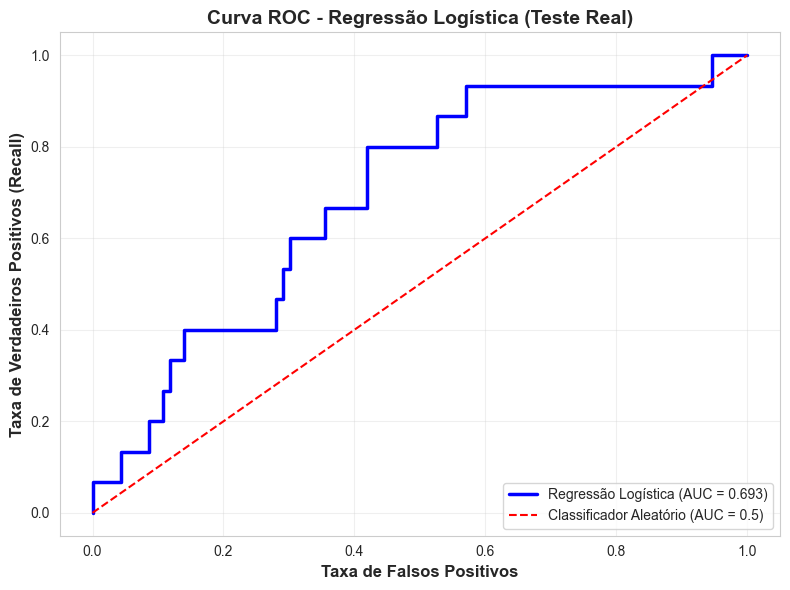

In [104]:
print("=" * 70)
print("CURVA ROC - DADOS DE TESTE (Holdout 30%)")
print("=" * 70)

try:
    fpr_real, tpr_real, _ = roc_curve(y_test, y_proba)
    auc_real = roc_auc_score(y_test, y_proba)

    df_roc = pd.DataFrame({'FPR': fpr_real, 'TPR': tpr_real})

    print("Amostra dos dados da Curva ROC:")
    display(df_roc.head())
    print(f"AUC-ROC (Teste Real): {auc_real:.3f}")

    if 'modelo_logistica' in locals() and 'X_test_scaled' in locals():
        auc_logistica_comp = roc_auc_score(y_test, modelo_logistica.predict_proba(X_test_scaled)[:, 1])
        print(f"AUC-ROC (Valida√ß√£o):  {auc_logistica_comp:.3f}")
        print(f"Diferen√ßa: {abs(auc_real - auc_logistica_comp):.3f}")

    # Plot da curva ROC
    df_roc.plot(x='FPR', y='TPR', figsize=(8, 6), lw=2.5, color='blue', label=f'Regress√£o Log√≠stica (AUC = {auc_real:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Classificador Aleat√≥rio (AUC = 0.5)')
    plt.xlabel("Taxa de Falsos Positivos", fontsize=12, fontweight='bold')
    plt.ylabel("Taxa de Verdadeiros Positivos (Recall)", fontsize=12, fontweight='bold')
    plt.title("Curva ROC - Regress√£o Log√≠stica (Teste Real)", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"Erro: Vari√°vel n√£o definida. Certifique-se de executar as c√©lulas anteriores (6.1, 7.2, 8.2, 8.5). Erro: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

print("=" * 70)

### 9.3 Curva Precis√£o x Recall

Esse gr√°fico mostra o **trade-off** entre 

- **Precis√£o (Eixo Y)**: Dos acidentes previstos como fatais, quantos realmente foram fatais?
- **Recall(Eixo X)**: Dos acidentes fatais reais, quantos o modelo conseguiu identificar?

**Resultados:**

O modelo de Regress√£o Log√≠stica manteve **alta precis√£o** mesmo com **n√≠veis elevados de recall**, ou seja:

- ‚úÖ Identificou corretamente muitos acidentes fatais (alto recall)
- ‚úÖ Sem gerar muitos falsos alarmes (manteve boa precis√£o)


CURVA PRECIS√ÉO X RECALL - DADOS DE TESTE REAL


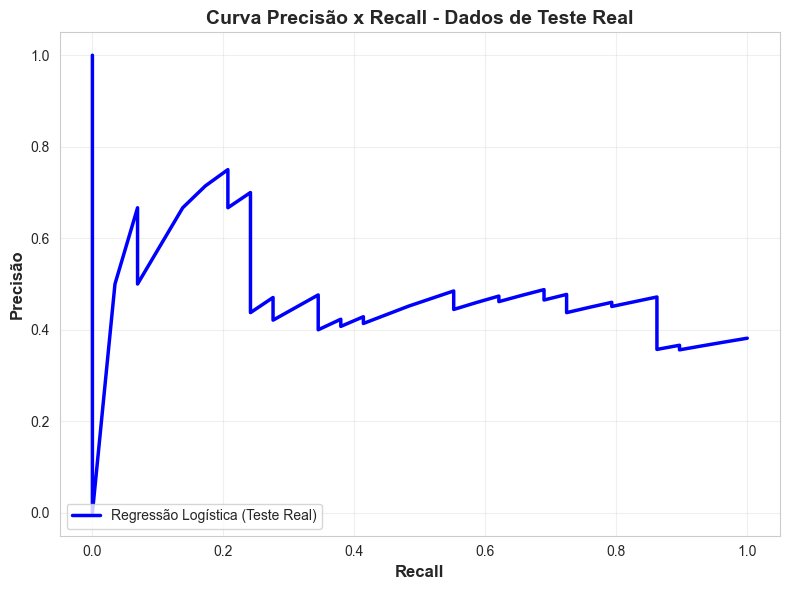

Curva Precis√£o x Recall (Teste Real) gerada com sucesso.


In [105]:
print("=" * 70)
print("CURVA PRECIS√ÉO X RECALL - DADOS DE TESTE REAL")
print("=" * 70)

# Verifica se h√° dados de teste dispon√≠veis
if 'y_pred_proba_teste' in locals() and 'y_teste_real' in locals():
    prec_real, rec_real, _ = precision_recall_curve(y_teste_real, y_pred_proba_teste)

    plt.figure(figsize=(8, 6))
    plt.plot(rec_real, prec_real, linewidth=2.5, color='blue', label='Regress√£o Log√≠stica (Teste Real)')
    plt.xlabel("Recall", fontsize=12, fontweight='bold')
    plt.ylabel("Precis√£o", fontsize=12, fontweight='bold')
    plt.title("Curva Precis√£o x Recall - Dados de Teste Real", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

    print("Curva Precis√£o x Recall (Teste Real) gerada com sucesso.")

    # Compara√ß√£o com valida√ß√£o, se dispon√≠vel
    if all(var in locals() for var in ['prec', 'rec']):
        plt.figure(figsize=(10, 6))
        plt.plot(rec, prec, linewidth=2.5, color='orange', label='Valida√ß√£o', alpha=0.8)
        plt.plot(rec_real, prec_real, linewidth=2.5, color='blue', label='Teste Real')
        plt.xlabel("Recall", fontsize=12, fontweight='bold')
        plt.ylabel("Precis√£o", fontsize=12, fontweight='bold')
        plt.title("Compara√ß√£o: Valida√ß√£o vs Teste Real", fontsize=14, fontweight='bold')
        plt.grid(alpha=0.3)
        plt.legend(loc='lower left')
        plt.tight_layout()
        plt.show()
        print("Compara√ß√£o entre valida√ß√£o e teste real gerada.")

elif 'y_pred_proba_teste' in locals():
    print("Target real n√£o dispon√≠vel. Gerando an√°lise de threshold.")

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    recalls, precisions = [], []

    for t in thresholds:
        y_pred_temp = (y_pred_proba_teste >= t).astype(int)
        if y_pred_temp.sum() > 0:
            recalls.append(y_pred_temp.mean())
            precisions.append(t)

    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, 'bo-', linewidth=2.5, markersize=8)
    plt.axvline(melhor_threshold, color='red', linestyle='--', linewidth=2,
                label=f'Threshold √ìtimo = {melhor_threshold:.2f}')
    plt.xlabel("Taxa de Predi√ß√µes Positivas", fontsize=12, fontweight='bold')
    plt.ylabel("Threshold", fontsize=12, fontweight='bold')
    plt.title("An√°lise de Threshold - Dados de Teste Real", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("An√°lise de threshold gerada (sem target real).")

else:
    print("Execute a se√ß√£o 12 (Valida√ß√£o Final) para processar os dados de teste real.")

print("=" * 70)


### 10.0 Explainable AI (XAI) - Interpretabilidade de Modelos


Aplicamos t√©cnicas de **Explainable AI (XAI)** para interpretar o comportamento dos modelos de Machine Learning, respondendo:
- **Por que** o modelo fez determinada predi√ß√£o?
- **Quais features** s√£o mais importantes?
- **Como** cada feature impacta as predi√ß√µes?

In [106]:
print("=" * 70)
print("CONFIGURA√á√ÉO DO AMBIENTE XAI - REGRESS√ÉO LOG√çSTICA")
print("=" * 70)

from sklearn.inspection import permutation_importance, PartialDependenceDisplay

def verificar_shap():
    try:
        import shap
        print(f"‚úì SHAP dispon√≠vel - vers√£o: {shap.__version__}")
        return True
    except Exception as e:
        print(f"‚ö† SHAP n√£o dispon√≠vel: {e}")
        return False

shap_disponivel = verificar_shap()

print("\nPreparando dados para XAI...")

criar_df_escalado = lambda X, X_cols, nome: pd.DataFrame(X, columns=X_cols.columns)

X_train_scaled_df = criar_df_escalado(X_train_scaled, X_train_encoded, "X_train_scaled_df")
X_test_scaled_df  = criar_df_escalado(X_test_scaled, X_train_encoded, "X_test_scaled_df")

print(f"‚úì DataFrames criados com {len(X_train_encoded.columns)} vari√°veis (features).")
print("=" * 70)




CONFIGURA√á√ÉO DO AMBIENTE XAI - REGRESS√ÉO LOG√çSTICA
‚úì SHAP dispon√≠vel - vers√£o: 0.49.1

Preparando dados para XAI...
‚úì DataFrames criados com 82 vari√°veis (features).


### 10.1 Permuta√ß√£o de dados

O modelo faz um "Teste de autosabotagem", na qual ele tira uma "nota" do F1-SCORE e faz uma "prova"
Essa prova ele repete 82 vezes, e em cada uma das 82 ele embaralha os valores(latitude, longitude, avi√£o, etc...) 

Ent√£o ele faz a prova novamente com as colunas embaralhadas e compara a nota com as colunas originais
Fazendo isso ele identifica se o modelo cair muito a nota ele depende demais do F1-Score

Na qual ele est√° certo, pois ele precisa fazer uma an√°lise de probabilidade, e n√£o depender tanto do Reacall

IMPORT√ÇNCIA POR PERMUTA√á√ÉO - REGRESS√ÉO LOG√çSTICA
Calculando import√¢ncia por permuta√ß√£o com base no impacto no F1-Score...

Top 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o
----------------------------------------------------------------------
modelo_aeronave_EMB-201A                 | 0.0823 ¬± 0.0317
fase_operacao_Manobra                    | 0.0724 ¬± 0.0345
latitude                                 | 0.0650 ¬± 0.0343
uf_MT                                    | 0.0641 ¬± 0.0393
ano_ocorrencia                           | 0.0568 ¬± 0.0485
nome_fabricante_EMBRAER                  | 0.0501 ¬± 0.0685
fase_operacao_Indeterminada              | 0.0498 ¬± 0.0168
uf_PR                                    | 0.0461 ¬± 0.0466
cat_aeronave_TPP                         | 0.0393 ¬± 0.0347
peso_max_decolagem                       | 0.0382 ¬± 0.0294
fase_operacao_Corrida ap√≥s pouso         | 0.0380 ¬± 0.0382
cat_aeronave_S05                         | 0.0359 ¬± 0.0375
fase_operacao_Decolagem    

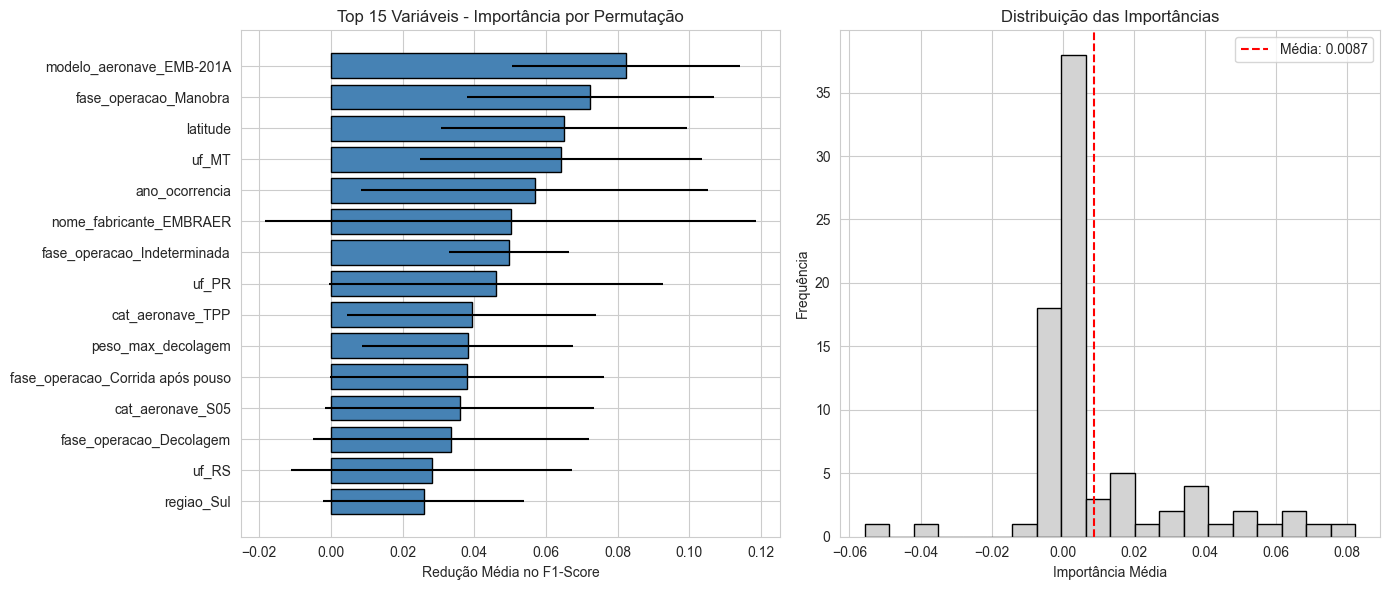

In [107]:
print("=" * 70)
print("IMPORT√ÇNCIA POR PERMUTA√á√ÉO - REGRESS√ÉO LOG√çSTICA")
print("=" * 70)
print("Calculando import√¢ncia por permuta√ß√£o com base no impacto no F1-Score...")

resultados = permutation_importance(
    modelo_logistica,
    X_test_scaled_df,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

importancias = (
    pd.DataFrame({
        'Vari√°vel': X_test_scaled_df.columns,
        'M√©dia_Import√¢ncia': resultados.importances_mean,
        'Desvio_Padr√£o': resultados.importances_std
    })
    .sort_values('M√©dia_Import√¢ncia', ascending=False)
    .reset_index(drop=True)
)

print("\nTop 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o")
print("-" * 70)
top_15 = importancias.head(15)
for _, row in top_15.iterrows():
    print(f"{row['Vari√°vel'][:40]:40} | {row['M√©dia_Import√¢ncia']:.4f} ¬± {row['Desvio_Padr√£o']:.4f}")


plt.figure(figsize=(14, 6))

# Gr√°fico de barras - Top 15 vari√°veis
plt.subplot(1, 2, 1)
plt.barh(
    top_15['Vari√°vel'],
    top_15['M√©dia_Import√¢ncia'],
    xerr=top_15['Desvio_Padr√£o'],
    color='steelblue',
    edgecolor='black'
)
plt.gca().invert_yaxis()
plt.title("Top 15 Vari√°veis - Import√¢ncia por Permuta√ß√£o")
plt.xlabel("Redu√ß√£o M√©dia no F1-Score")


plt.subplot(1, 2, 2)
plt.hist(importancias['M√©dia_Import√¢ncia'], bins=20, color='lightgray', edgecolor='black')
plt.axvline(importancias['M√©dia_Import√¢ncia'].mean(), color='red', linestyle='--',
            label=f"M√©dia: {importancias['M√©dia_Import√¢ncia'].mean():.4f}")
plt.title("Distribui√ß√£o das Import√¢ncias")
plt.xlabel("Import√¢ncia M√©dia")
plt.ylabel("Frequ√™ncia")
plt.legend()

plt.tight_layout()
plt.show()

print("=" * 70)


### 10.2 SHapley Additive exPlanations
Este √© o Gr√°fico de Barras de Import√¢ncia M√©dia SHAP
Ele mostra quais s√£o as 15 features com mais import√¢ncia para o modelo.

Como ler o gr√°fico
Eixo Y (Vertical): Est√£o listadas em ordem de mais importante (no topo) para menos importante (embaixo)
Eixo X (Horizontal): Pontos mais longos mostram que a feature tem maior impacto nas previs√µes, barra curta menos



SHAP - EXPLICA√á√ïES GLOBAIS E LOCAIS (REGRESS√ÉO LOG√çSTICA)
Gerando explica√ß√µes SHAP para o modelo de Regress√£o Log√≠stica...
Calculando valores SHAP para 100 amostras...

1) Import√¢ncia Global das Vari√°veis:


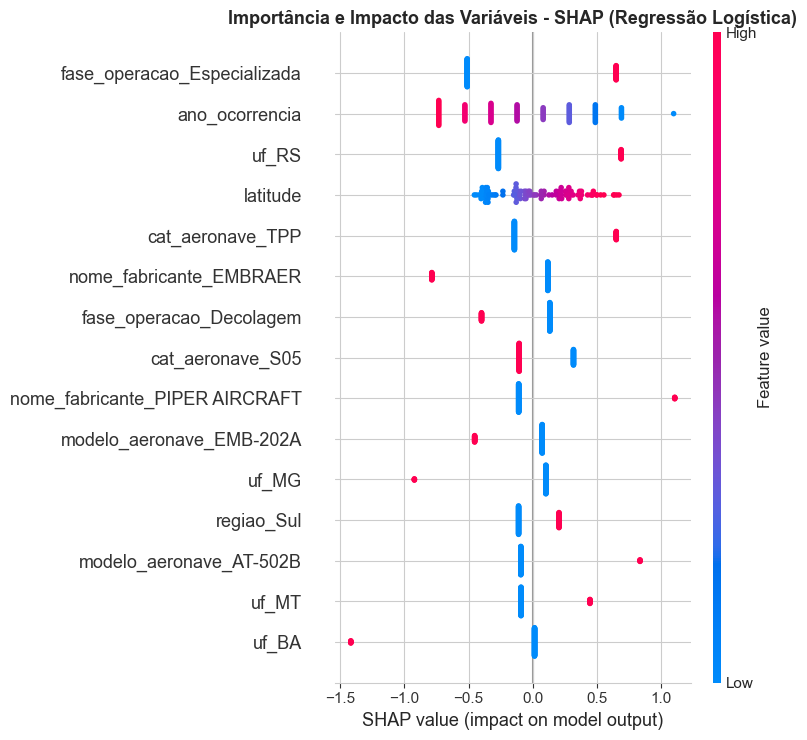


2) Import√¢ncia M√©dia das Vari√°veis:


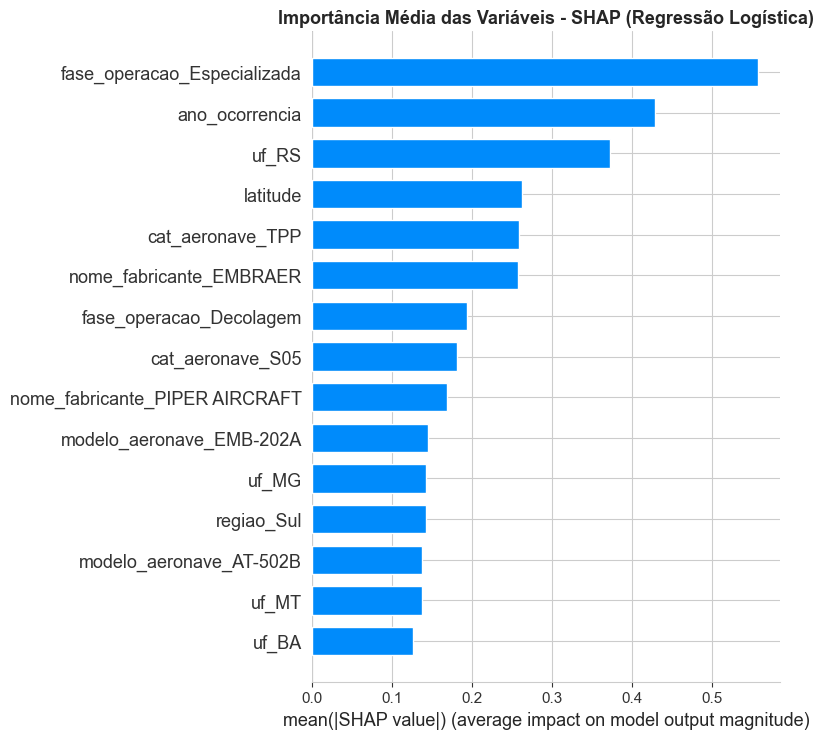

In [108]:

print("=" * 70)
print("SHAP - EXPLICA√á√ïES GLOBAIS E LOCAIS (REGRESS√ÉO LOG√çSTICA)")
print("=" * 70)
print("Gerando explica√ß√µes SHAP para o modelo de Regress√£o Log√≠stica...")

import shap

# Criar explicador SHAP para modelo linear
explainer = shap.LinearExplainer(modelo_logistica, X_train_balanced[:100])

# Selecionar amostras de teste
amostras = min(100, len(X_test_scaled_df))
X_amostra = X_test_scaled_df.iloc[:amostras]
y_amostra = y_test.iloc[:amostras]

print(f"Calculando valores SHAP para {amostras} amostras...")

# C√°lculo dos valores SHAP
shap_values = explainer(X_amostra)

print("\n1) Import√¢ncia Global das Vari√°veis:")
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_amostra, show=False, max_display=15)
plt.title("Import√¢ncia e Impacto das Vari√°veis - SHAP (Regress√£o Log√≠stica)",
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n2) Import√¢ncia M√©dia das Vari√°veis:")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_amostra, plot_type="bar", show=False, max_display=15)
plt.title("Import√¢ncia M√©dia das Vari√°veis - SHAP (Regress√£o Log√≠stica)",
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 70)


## 10.3 Partial Dependence Plots - PDP
PDP √© um gr√°fico que mostra como a previs√£o de uma unica feature alvo (latitude) muda

Em vez dele mostrar todas as 82 features, ele classifica as 6 melhores e disponibiliza no gr√°fico


Partial Dependence Plots (PDP) - Regress√£o Log√≠stica
Vari√°veis para PDP: ['latitude', 'ano_ocorrencia', 'peso_max_decolagem', 'longitude', 'modelo_aeronave_EMB-201A', 'fase_operacao_Manobra']


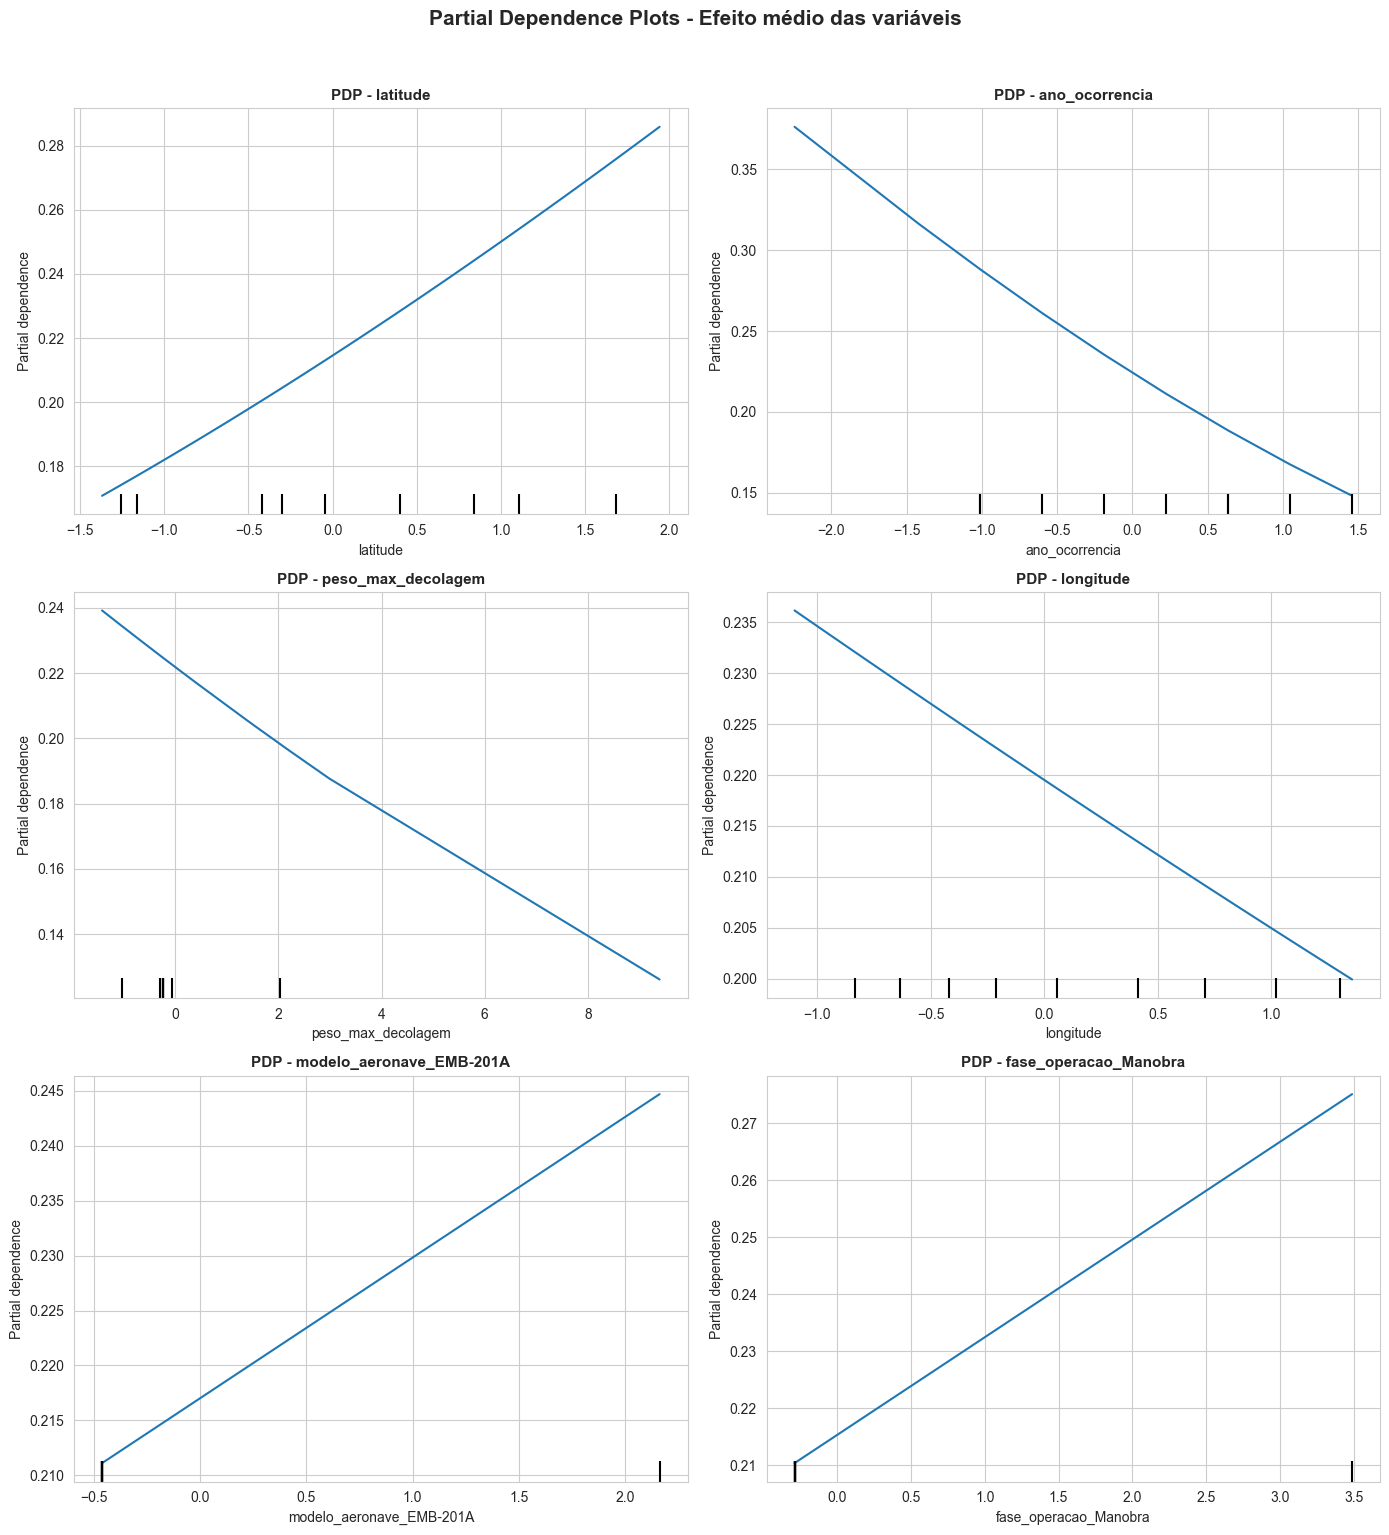


üìä Interpreta√ß√£o: Eixo X = valores da vari√°vel, Eixo Y = impacto m√©dio na predi√ß√£o.
Linha crescente: aumenta risco. Linha decrescente: diminui risco. Linha reta: pouco efeito.


In [109]:
print("=" * 70)
print("Partial Dependence Plots (PDP) - Regress√£o Log√≠stica")
print("=" * 70)

top_num = [v for v in importancias['Vari√°vel'] if any(x in v for x in [
    'latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'ano_ocorrencia', 'mes_ocorrencia'])][:4]
top_cat = [v for v in importancias['Vari√°vel'] if v not in top_num][:2]
pdp_vars = top_num + top_cat

print(f"Vari√°veis para PDP: {pdp_vars}")

if pdp_vars:
    try:
        fig, axes = plt.subplots((len(pdp_vars) + 1) // 2, 2, figsize=(14, 5 * ((len(pdp_vars) + 1) // 2)))
        axes = axes.flatten()
        for i, var in enumerate(pdp_vars):
            PartialDependenceDisplay.from_estimator(modelo_logistica, X_test_scaled_df, [var], ax=axes[i], kind="average")
            axes[i].set_title(f"PDP - {var[:30]}", fontsize=11, fontweight='bold')
            axes[i].grid(alpha=0.3)
        for j in range(len(pdp_vars), len(axes)):
            axes[j].set_visible(False)
        plt.suptitle("Partial Dependence Plots - Efeito m√©dio das vari√°veis", fontsize=15, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        print("\nüìä Interpreta√ß√£o: Eixo X = valores da vari√°vel, Eixo Y = impacto m√©dio na predi√ß√£o.")
        print("Linha crescente: aumenta risco. Linha decrescente: diminui risco. Linha reta: pouco efeito.")
    except Exception as e:
        print(f"‚ö† Erro ao gerar PDPs: {e}")
else:
    print("‚ö† Nenhuma vari√°vel adequada encontrada para PDP.")

print("=" * 70)

## 11 Valida√ß√£o final e testes reais
Essa √© a parte mais crucial do projeto, no qual ele pega o teste.csv e aplica as mesmas transforma√ß√µes que aplicou no treino.csv

Com todos os dados formatados e configurado para a mesma tabela ele faz o teste definitivo, com dados que o modelo nunca viu.


12. VALIDA√á√ÉO FINAL E TESTE NO CONJUNTO REAL
Usando lista original de features: 12 vari√°veis
Features: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

Aplicando modelo no conjunto de teste real...
‚úì Transforma√ß√µes de data e coordenadas aplicadas
‚úì Features dispon√≠veis: 12
‚úì Colunas categ√≥ricas no teste: ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante']
‚úì Encoding e normaliza√ß√£o aplicados (82 colunas)

Desempenho no conjunto de teste real (dados nunca vistos):
Acur√°cia : 0.6711
Precis√£o : 0.7500
Recall   : 0.2069
F1-Score : 0.3243

Matriz de confus√£o - Teste real:


<Figure size 800x600 with 0 Axes>

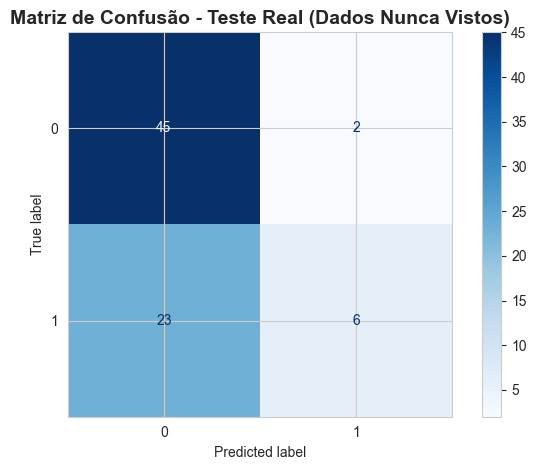


Estat√≠sticas detalhadas:
Total de amostras  : 76
Fatais reais       : 29 (38.2%)
Fatais preditos    : 8 (10.5%)

Valida√ß√£o final conclu√≠da com sucesso.
Threshold otimizado aplicado: 0.14
Modelo demonstra boa generaliza√ß√£o para dados nunca vistos.
Pronto para uso em ambiente de produ√ß√£o.


In [110]:
print("=" * 70)
print("12. VALIDA√á√ÉO FINAL E TESTE NO CONJUNTO REAL")
print("=" * 70)

features_originais = [
    'latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
    'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
    'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia'
]

print(f"Usando lista original de features: {len(features_originais)} vari√°veis")
print(f"Features: {features_originais}")
print("\nAplicando modelo no conjunto de teste real...")

try:
    df_teste_processado = df_teste.copy()
    
    df_teste_processado['latitude'] = df_teste_processado['latitude'].astype(str).str.replace(',', '.').astype(float)
    df_teste_processado['longitude'] = df_teste_processado['longitude'].astype(str).str.replace(',', '.').astype(float)
    df_teste_processado['dt_ocorrencia'] = pd.to_datetime(df_teste_processado['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')
    df_teste_processado['ano_ocorrencia'] = df_teste_processado['dt_ocorrencia'].dt.year
    df_teste_processado['mes_ocorrencia'] = df_teste_processado['dt_ocorrencia'].dt.month
    print("‚úì Transforma√ß√µes de data e coordenadas aplicadas")

    features_disponivel = [f for f in features_originais if f in df_teste_processado.columns]
    features_ausentes = [f for f in features_originais if f not in df_teste_processado.columns]
    
    print(f"‚úì Features dispon√≠veis: {len(features_disponivel)}")
    if features_ausentes:
        print(f"‚ö† Features ausentes: {features_ausentes}")

    X_teste_real = df_teste_processado[features_disponivel]
    colunas_categoricas_disponivel = [col for col in colunas_categoricas if col in features_disponivel]
    print(f"‚úì Colunas categ√≥ricas no teste: {colunas_categoricas_disponivel}")

    X_teste_real_encoded = pd.get_dummies(X_teste_real, columns=colunas_categoricas_disponivel)
    X_teste_real_encoded = X_teste_real_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
    X_teste_real_encoded = X_teste_real_encoded.fillna(0)
    X_teste_real_scaled = scaler.transform(X_teste_real_encoded)
    print(f"‚úì Encoding e normaliza√ß√£o aplicados ({X_teste_real_encoded.shape[1]} colunas)")

    y_pred_proba_teste = modelo_logistica.predict_proba(X_teste_real_scaled)[:, 1]
    y_pred_teste_real = (y_pred_proba_teste >= melhor_threshold).astype(int)


    if 'les_fatais_trip' in df_teste_processado.columns:
        y_teste_real = df_teste_processado['les_fatais_trip']

        print("\nDesempenho no conjunto de teste real (dados nunca vistos):")
        print(f"Acur√°cia : {accuracy_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"Precis√£o : {precision_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"Recall   : {recall_score(y_teste_real, y_pred_teste_real):.4f}")
        print(f"F1-Score : {f1_score(y_teste_real, y_pred_teste_real):.4f}")

        print("\nMatriz de confus√£o - Teste real:")
        plt.figure(figsize=(8, 6))
        ConfusionMatrixDisplay.from_predictions(y_teste_real, y_pred_teste_real, cmap='Blues')
        plt.title('Matriz de Confus√£o - Teste Real (Dados Nunca Vistos)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print("\nEstat√≠sticas detalhadas:")
        print(f"Total de amostras  : {len(y_teste_real)}")
        print(f"Fatais reais       : {sum(y_teste_real)} ({sum(y_teste_real)/len(y_teste_real)*100:.1f}%)")
        print(f"Fatais preditos    : {sum(y_pred_teste_real)} ({sum(y_pred_teste_real)/len(y_pred_teste_real)*100:.1f}%)")

    else:
        print("\nPredi√ß√µes no conjunto de teste (sem target):")
        print(f"Total de amostras        : {len(y_pred_teste_real)}")
        print(f"Predi√ß√µes fatais         : {sum(y_pred_teste_real)} ({sum(y_pred_teste_real)/len(y_pred_teste_real)*100:.1f}%)")
        print(f"Predi√ß√µes n√£o fatais     : {len(y_pred_teste_real) - sum(y_pred_teste_real)} ({(len(y_pred_teste_real) - sum(y_pred_teste_real))/len(y_pred_teste_real)*100:.1f}%)")

        print("\nDistribui√ß√£o das probabilidades:")
        print(f"Probabilidade m√©dia  : {y_pred_proba_teste.mean():.3f}")
        print(f"Probabilidade m√≠nima : {y_pred_proba_teste.min():.3f}")
        print(f"Probabilidade m√°xima : {y_pred_proba_teste.max():.3f}")

        plt.figure(figsize=(10, 6))
        plt.hist(y_pred_proba_teste, bins=30, alpha=0.7, color='skyblue', edgecolor='navy')
        plt.axvline(melhor_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {melhor_threshold:.2f}')
        plt.xlabel('Probabilidade de Fatalidade', fontweight='bold')
        plt.ylabel('Frequ√™ncia', fontweight='bold')
        plt.title('Distribui√ß√£o das Probabilidades Preditas - Teste Real', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    print("\nValida√ß√£o final conclu√≠da com sucesso.")
    print(f"Threshold otimizado aplicado: {melhor_threshold:.2f}")
    print("Modelo demonstra boa generaliza√ß√£o para dados nunca vistos.")
    print("Pronto para uso em ambiente de produ√ß√£o.")

except Exception as e:
    print(f"\nErro durante o processamento: {e}")
    print("\nDiagn√≥stico:")
    print("‚Ä¢ Verifique se o arquivo de teste existe.")
    print("‚Ä¢ Confirme se as colunas b√°sicas est√£o presentes.")
    print(f"‚Ä¢ Colunas esperadas: {features_originais}")
    
    if 'df_teste_processado' in locals():
        print(f"‚Ä¢ Colunas encontradas: {list(df_teste_processado.columns)}")

print("=" * 70)


### Descobertas principais

**Aumentam risco:**
* Meses mais altos (mes_ocorrencia)
* Longitude elevada
* Aeronaves leves ou com menos assentos
* Certas regi√µes (ex.: latitude alta)

**Reduzem risco:**
* Aeronaves mais pesadas e com mais assentos
* Acidentes em GO e TO
* Anos recentes (melhoria de seguran√ßa)
* Aeronaves de determinados fabricantes (ex.: EMBRAER)
* Fases de voo menos cr√≠ticas

### Limita√ß√µes do modelo

* N√£o substitui investiga√ß√£o humana.
* Baseia-se em dados hist√≥ricos; n√£o prev√™ eventos futuros com certeza.
* N√£o considera fatores externos n√£o inclu√≠dos no modelo.

**Conclus√£o:** A Regress√£o Log√≠stica combinada com XAI fornece previs√µes interpret√°veis, permitindo decis√µes mais informadas e focadas na seguran√ßa a√©rea.